# Post Test

In [1]:
import pandas as pd

# Define the relative path to the CSV file
file_path = "../../../cleaned_data/questionnaire_df.csv"

questionnaire_df = pd.read_csv(file_path)

# Filter columns that contain "PERSONAL" or "SEQ" in their names
filtered_columns = [col for col in questionnaire_df.columns if "Controller" in col or "POST-TEST" in col]


# Create a new dataframe with the filtered columns
filtered_df = questionnaire_df[filtered_columns]

df = filtered_df
# Remove "PERSONAL_" prefix from all column names
df.columns = [col.replace("POST-TEST_", "") for col in df.columns]
df.columns = [col.replace("PERSONAL_", "") for col in df.columns]

# Replace "Chiron" with "SBC" in the "controller" column
df['Controller being tested?'] = df['Controller being tested?'].replace("Chiron", "SBC")

# Display the new dataframe
df.head()

<ipython-input-1-306a5b68af72>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Controller being tested?'] = df['Controller being tested?'].replace("Chiron", "SBC")


,Controller being tested?,Questions related to the simulation WITH VR [I feel like the depth perception in simulation was better than in the real world],Questions related to the simulation WITH VR [I felt like teleoperating the robot in simulation and in the real world was a similar experience],Questions related to the simulation WITHOUT VR [I feel like the depth perception in simulation was better than in the real world],Questions related to the simulation WITHOUT VR [I felt like teleoperating the robot in simulation and in the real world was a similar experience],"In the real world experiments, please choose your preference for each of the topics [Which setup allowed you to complete the tasks more efficiently?]","In the real world experiments, please choose your preference for each of the topics [Which setup made it easier to operate the robot accurately?]","In the real world experiments, please choose your preference for each of the topics [Which setup did you find more comfortable?]","In the real world experiments, please choose your preference for each of the topics [Which setup would you be willing to use many times again?]","In the real world experiments, please choose your preference for each of the topics [Which setup felt more immersive?]","In the real world experiments, please choose your preference for each of the topics [Overall, which one did you like the most?]",Did you notice any difference in how you controlled the robot between the simulation and the real-world environment?,Did you notice any difference in how you controlled the robot in real world using the VR and not?,What improvements would you suggest for each setup?,What did you like most about using VR/non-VR for teleoperating the robot?
0,SBC,Strongly Disagree,Strongly Disagree,Strongly Disagree,Slightly Disagree,without VR,without VR,without VR,without VR,with VR,without VR,"In sim it feels a lot lighter, mapping my move...",Had to use the neck a lot to look around the s...,It is fine for the most part. It would be nice...,Really liked the control scheme. The base felt...
1,SBC,Strongly Disagree,Slightly Disagree,Strongly Agree,Neither Agree nor Disagree,without VR,without VR,without VR,Same,Same,without VR,"Looked around in the room. With the screens, w...",Being in the same room gave more confidence to...,Time delay of the cameras to improve confidenc...,"The task was boring, but it was fun either way..."
2,SBC,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,without VR,without VR,without VR,Same,with VR,with VR,"In the real world, the embodiment felt more na...","Without the VR, since it is in the same room, ...",Camera views could be wider. A 3rd person view...,Using the headset makes the experience more im...
3,SBC,Strongly Disagree,Slightly Disagree,Strongly Disagree,Slightly Disagree,Same,without VR,with VR,Same,with VR,Same,"In the real world had audio feedback, hear whe...",Was more aware of the environment without the ...,Didn't expect it to work so well. Previously t...,It was fun
4,SBC,Slightly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,without VR,without VR,without VR,without VR,with VR,Same,"Similar, main difference is that in the real w...",With headset took more time to realize the dep...,With headset would be interesting to have some...,The teleop felt smooth without the headset


In [2]:
df.to_csv("post_test.csv",index=False)

In [8]:
# Extract relevant columns containing Likert scale responses
likert_columns = [col for col in df.columns if "Questions related to the simulation" in col]

# Define response categories in the correct order
response_order = [
    "Strongly Disagree", "Disagree", "Slightly Disagree", 
    "Neither Agree nor Disagree", "Slightly Agree", "Agree", "Strongly Agree"
]

# Prepare data for visualization
plot_data = []
for col in likert_columns:
    response_counts = df[col].value_counts(normalize=True) * 100
    for response, percentage in response_counts.items():
        plot_data.append({"Question": col, "Response": response, "Percentage": percentage})

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

df_with_vr = plot_df[:7]
df_wo_vr = plot_df[7:]
plot_df = df_wo_vr

In [9]:
plot_df

,Question,Response,Percentage
7,Questions related to the simulation WITHOUT VR...,Strongly Disagree,65.0
8,Questions related to the simulation WITHOUT VR...,Slightly Disagree,20.0
9,Questions related to the simulation WITHOUT VR...,Strongly Agree,5.0
10,Questions related to the simulation WITHOUT VR...,Slightly Agree,5.0
11,Questions related to the simulation WITHOUT VR...,Neither Agree nor Disagree,5.0
12,Questions related to the simulation WITHOUT VR...,Slightly Disagree,45.0
13,Questions related to the simulation WITHOUT VR...,Strongly Disagree,25.0
14,Questions related to the simulation WITHOUT VR...,Neither Agree nor Disagree,15.0
15,Questions related to the simulation WITHOUT VR...,Slightly Agree,15.0


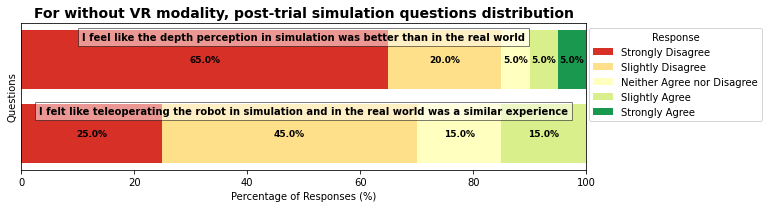

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# Function to extract and clean question text for better readability in the plot
def clean_question_text(question):
    if "depth perception" in question:
        return "I feel like the depth perception in simulation was better than in the real world"
    elif "teleoperating the robot" in question:
        return "I felt like teleoperating the robot in simulation and in the real world was a similar experience"
    return question

# Define colors for the Likert scale
likert_palette = {
    "Strongly Disagree": "#D73027",  # Dark Red
    "Disagree": "#FC8D59",  # Light Red
    "Slightly Disagree": "#FEE08B",  # Yellow
    "Neither Agree nor Disagree": "#FFFFBF",  # Light Yellow
    "Slightly Agree": "#D9EF8B",  # Light Green
    "Agree": "#91CF60",  # Green
    "Strongly Agree": "#1A9850"   # Dark Green
}

# Apply the function to clean the question text for display
plot_df["Cleaned_Question"] = plot_df["Question"].apply(clean_question_text)

# Pivot the data to create a stacked bar chart format
stacked_data = plot_df.pivot(index="Cleaned_Question", columns="Response", values="Percentage").fillna(0)
stacked_data = stacked_data.reindex(index=stacked_data.index[::-1])  # Reverse order for display consistency

# Check which response categories are available in the dataset
available_responses = stacked_data.columns.tolist()

# Adjust response order to match available responses
adjusted_response_order = [resp for resp in response_order if resp in available_responses]

# Ensure the responses in stacked_data are in the correct order
stacked_data = stacked_data[adjusted_response_order].fillna(0)

# Create the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(11, 3))
left = np.zeros(len(stacked_data))

for response in adjusted_response_order:
    bars = ax.barh(stacked_data.index, stacked_data[response], color=likert_palette.get(response, "#CCCCCC"), label=response, left=left)
    left += stacked_data[response]  # Shift left position for next category

    # Add percentage text on each colored segment
    for bar, percentage in zip(bars, stacked_data[response]):
        if percentage > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"{percentage:.1f}%", 
                    ha="center", va="center", fontsize=9, color="black", fontweight="bold")

# Add cleaned question text on top of each bar
for i, question in enumerate(stacked_data.index):
    ax.text(50, i+0.3, question, ha="center", va="center", fontsize=10, fontweight="bold", bbox=dict(facecolor='white', alpha=0.5))

# Customize the plot
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage of Responses (%)")
ax.set_ylabel("Questions")
ax.set_yticks([])  # Remove y-axis labels
ax.set_title("For without VR modality, post-trial simulation questions distribution", fontsize=14, fontweight="bold")
ax.legend(title="Response", loc="upper right", bbox_to_anchor=(1.32, 1))

plt.tight_layout()
plt.savefig("post_test_sim_wo_vr.pdf", format='pdf')
plt.show()


<ipython-input-5-797a34041326>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-5-797a34041326>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-5-797a34041326>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-5-797a34041326>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-5-797a34041326>:41: FutureWarning: 

Passing `palette

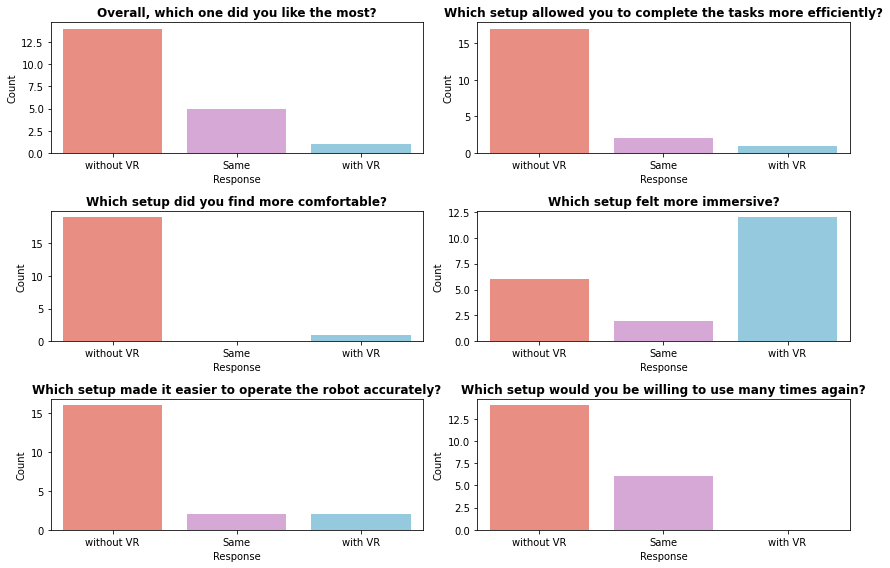

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
file_path = "post_test.csv"
df_new = pd.read_csv(file_path)

# Extract relevant columns for bar plots (Columns 5 to 10)
columns_to_plot = df_new.columns[5:11]

# Function to extract the actual question inside brackets [ ]
def extract_question(text):
    match = re.search(r'\[(.*?)\]', text)
    return match.group(1) if match else text

# Count the occurrences of each response for each question
plot_data = []
for col in columns_to_plot:
    response_counts = df_new[col].value_counts().reset_index()
    response_counts.columns = ["Response", "Count"]
    response_counts["Question"] = extract_question(col)  # Apply extracted question text
    plot_data.append(response_counts)

# Combine all responses into a single DataFrame
plot_df = pd.concat(plot_data)

# Define custom colors for responses
custom_palette = {
    "without VR": "salmon",
    "Same": "plum",  # Light purple
    "with VR": "skyblue"
}

# Create bar plots for each question with cleaned titles and custom colors
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))  # 2 plots per row
axes = axes.flatten()

for i, (question, data) in enumerate(plot_df.groupby("Question")):
    sns.barplot(
        data=data, x="Response", y="Count", ax=axes[i], 
        palette=[custom_palette.get(resp, "gray") for resp in ["without VR", "Same", "with VR"]], 
        order=["without VR", "Same", "with VR"]
    )
    axes[i].set_title(question, fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Response")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig("post_test_comparison.pdf", format='pdf')
plt.show()
